In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/DSA2025Spring/Final_Sleep_Analysis.xlsx'
df = pd.read_excel(file_path)
df.head()
df.info()
df.isnull().sum()

In [26]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head()
df.info()
df.isnull().sum()

In [ ]:
df.describe()

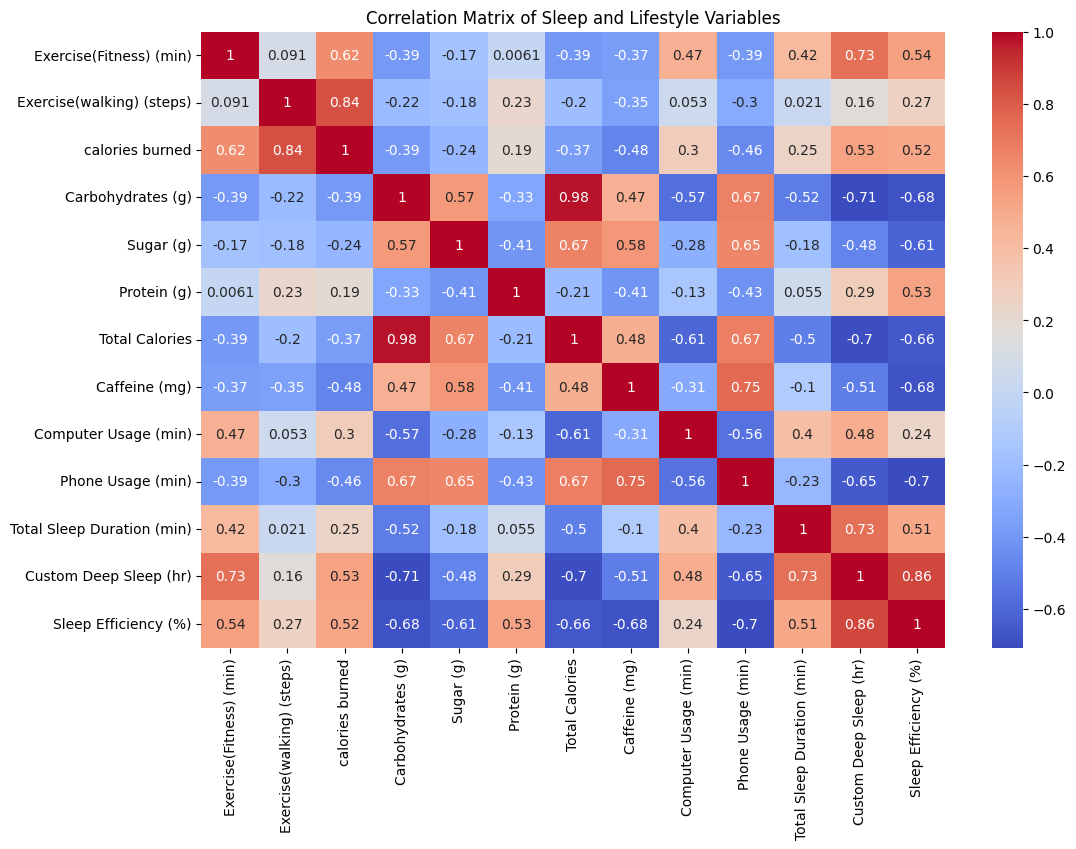

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Sleep and Lifestyle Variables")
plt.show()

In [22]:
selected_vars = [
    "Exercise(Fitness) (min)",
    "Exercise(walking) (steps)",
    "Caffeine (mg)",
    "Phone Usage (min)",
    "Computer Usage (min)",
    "Total Calories",
    "Carbohydrates (g)",
    "Sugar (g)"
]

# Korelasyonları sleep score ve deep sleep ile göster
for var in selected_vars:
    r1 = df["Sleep Efficiency (%)"].corr(df[var])
    r2 = df["Custom Deep Sleep (hr)"].corr(df[var])
    print(f"{var} -> Sleep Score Corr: {r1:.2f}, Deep Sleep Corr: {r2:.2f}")

Exercise(Fitness) (min) -> Sleep Score Corr: 0.54, Deep Sleep Corr: 0.73
Exercise(walking) (steps) -> Sleep Score Corr: 0.27, Deep Sleep Corr: 0.16
Caffeine (mg) -> Sleep Score Corr: -0.68, Deep Sleep Corr: -0.51
Phone Usage (min) -> Sleep Score Corr: -0.70, Deep Sleep Corr: -0.65
Computer Usage (min) -> Sleep Score Corr: 0.24, Deep Sleep Corr: 0.48
Total Calories -> Sleep Score Corr: -0.66, Deep Sleep Corr: -0.70
Carbohydrates (g) -> Sleep Score Corr: -0.68, Deep Sleep Corr: -0.71
Sugar (g) -> Sleep Score Corr: -0.61, Deep Sleep Corr: -0.48


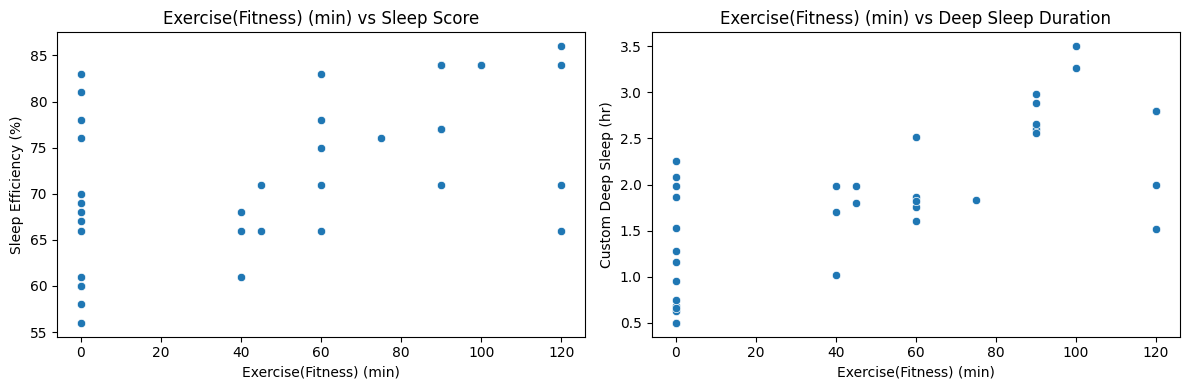

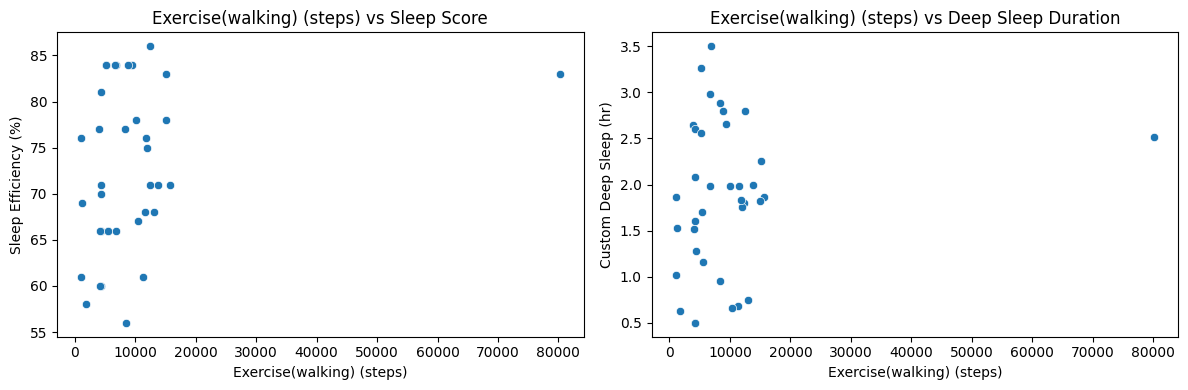

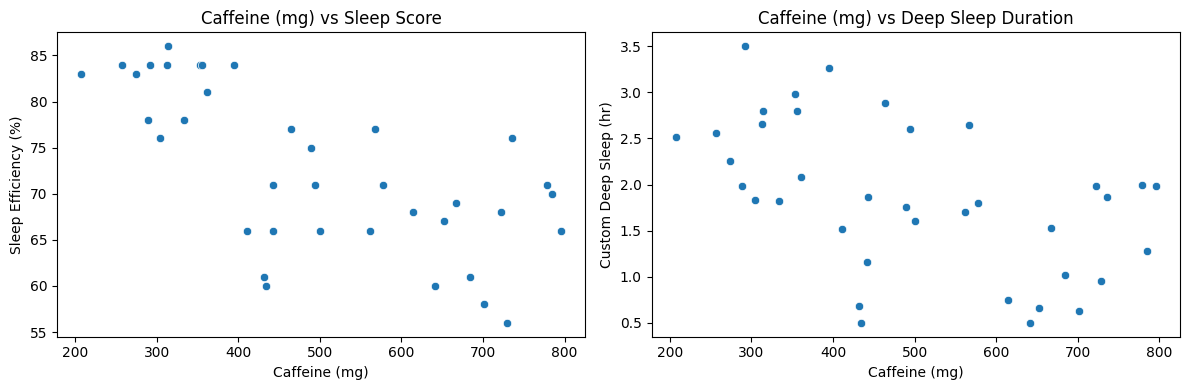

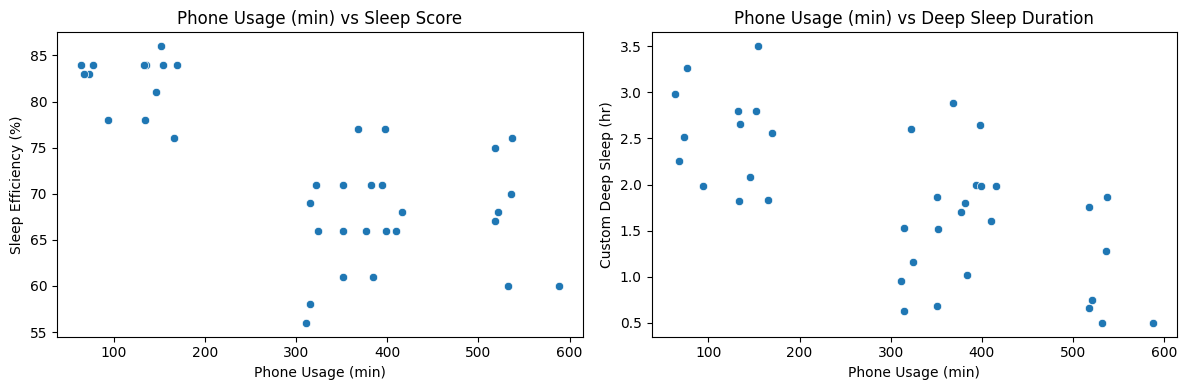

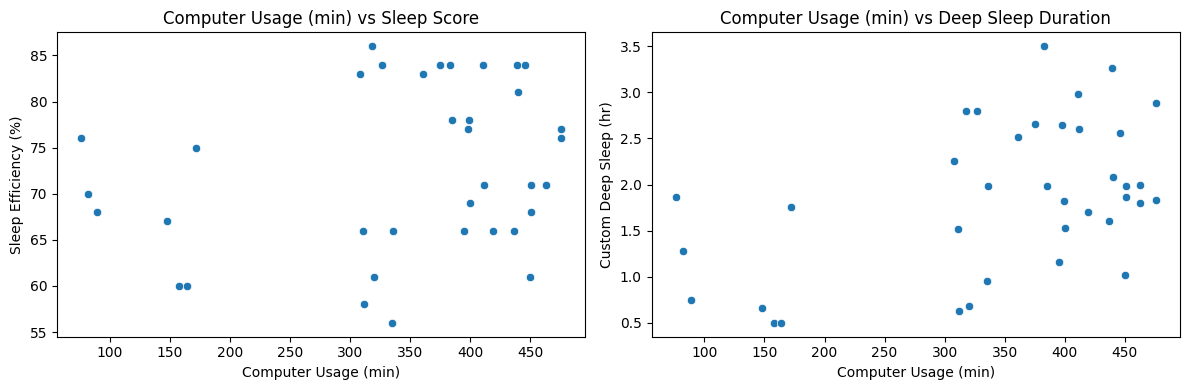

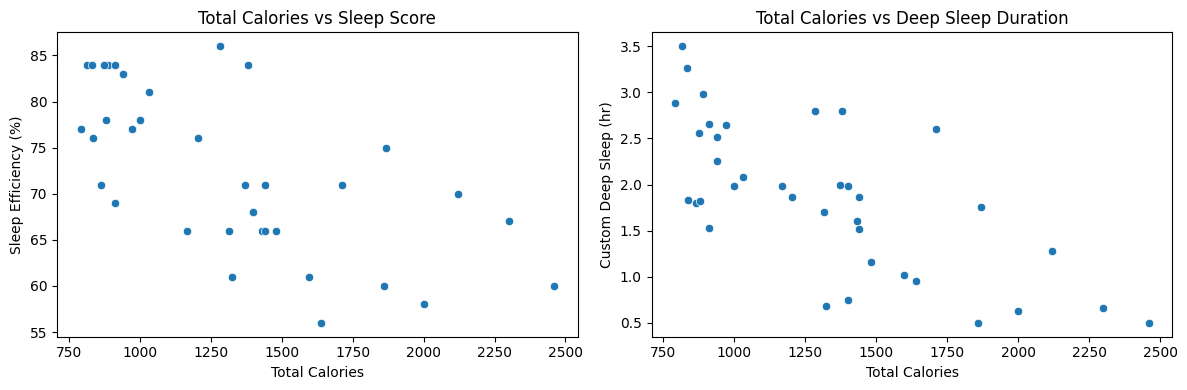

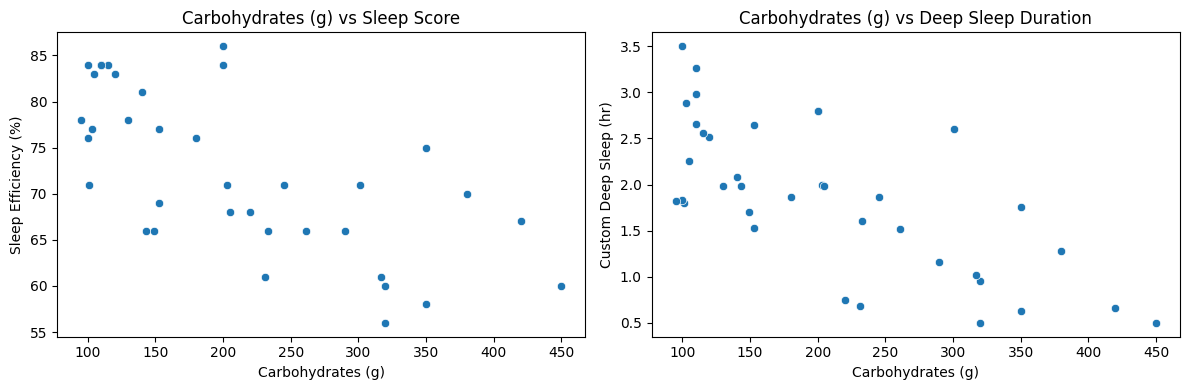

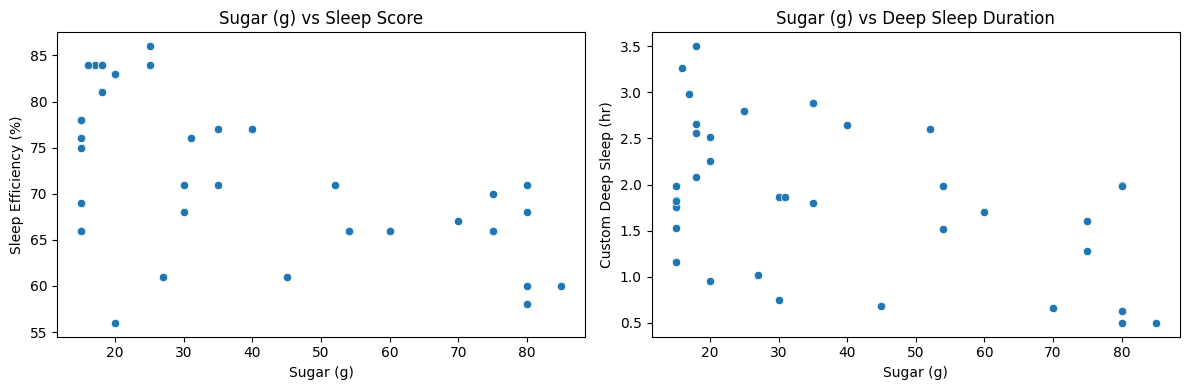

In [23]:
for var in selected_vars:
    plt.figure(figsize=(12, 4))

    # Sleep Score vs Variable
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=var, y="Sleep Efficiency (%)")
    plt.title(f"{var} vs Sleep Score")

    # Deep Sleep vs Variable
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=var, y="Custom Deep Sleep (hr)")
    plt.title(f"{var} vs Deep Sleep Duration")

    plt.tight_layout()
    plt.show()

In [30]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

<ipython-input-82-e40da22b8040>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


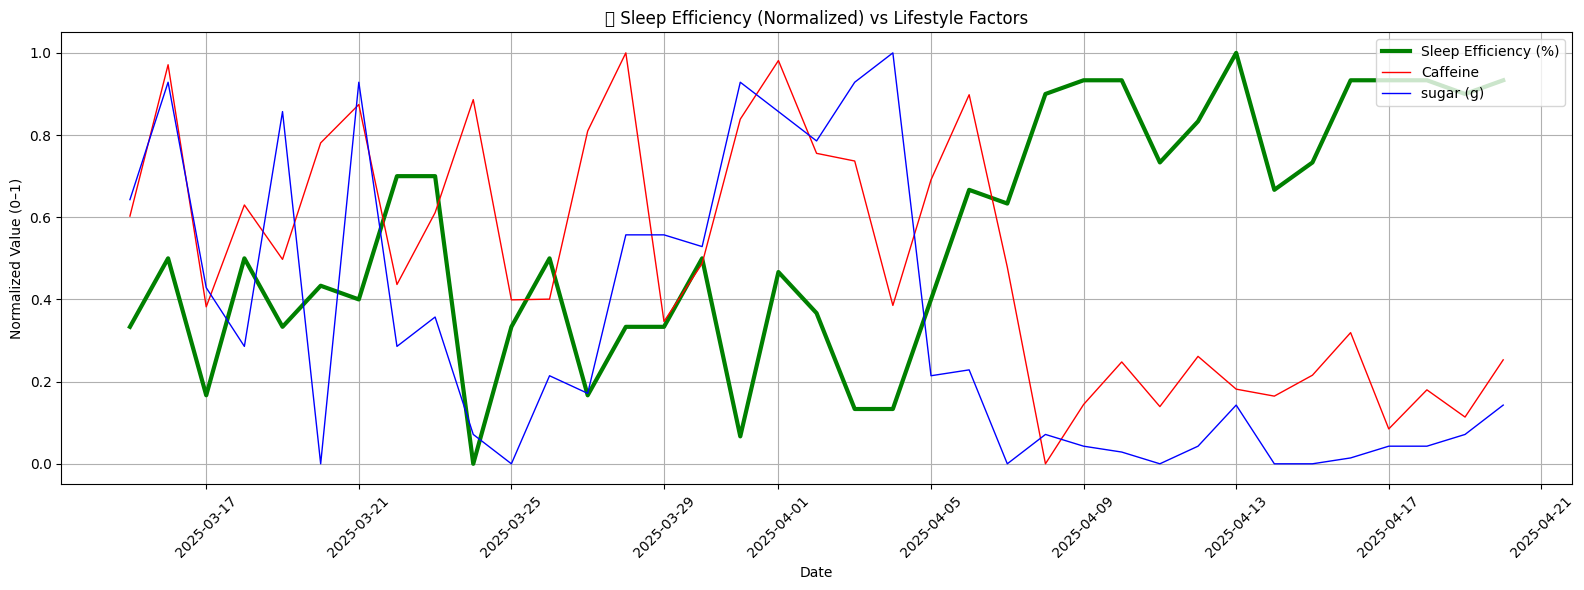

In [82]:
plt.figure(figsize=(16, 6))

# Sleep Score: kalın çizgi
plt.plot(df["Date"], normalize(df["Sleep Efficiency (%)"]), label="Sleep Efficiency (%)", color="green", linewidth=3)

# Diğer değişkenler: normalize edilmiş ve şeffaf

plt.plot(df["Date"], normalize(df["Caffeine (mg)"]), label="Caffeine", color="red",linewidth=1)
plt.plot(df["Date"], normalize(df["Sugar (g)"]), label="sugar (g)", color="blue",linewidth=1)


plt.title("📈 Sleep Efficiency (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-83-6ee95bf86a74>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


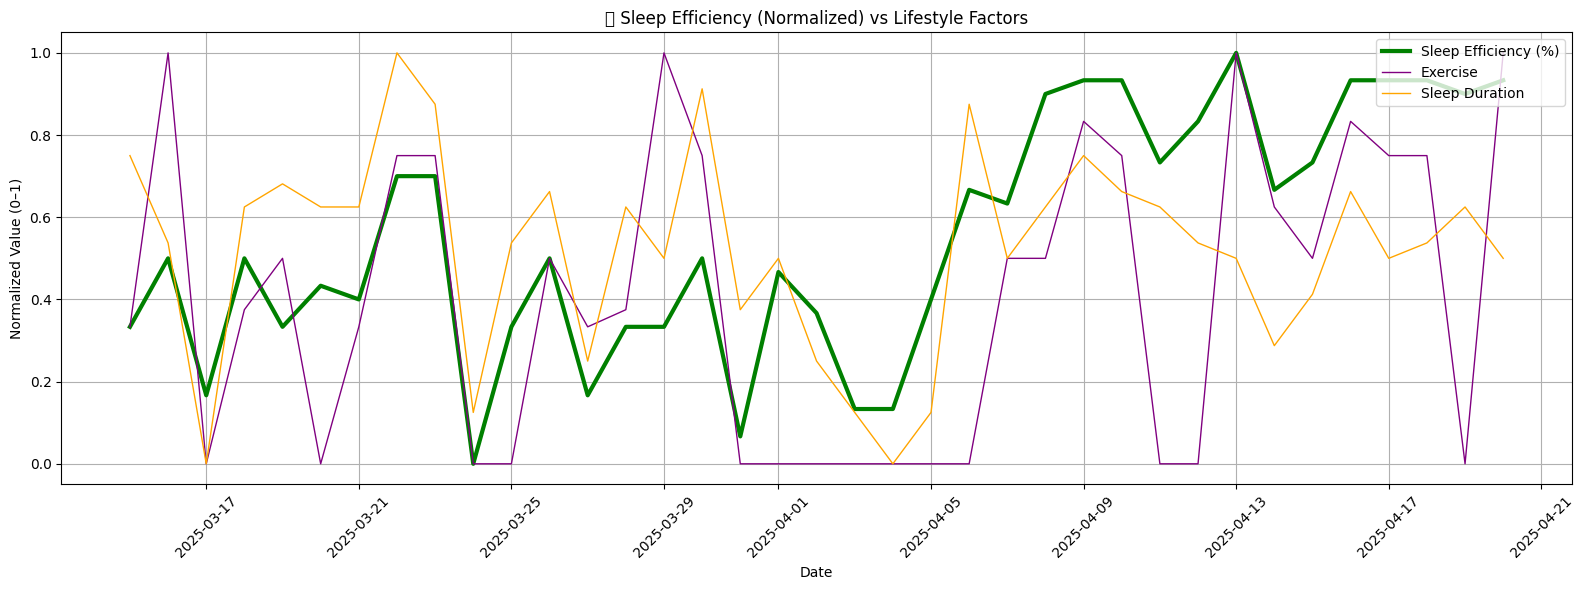

In [83]:
plt.figure(figsize=(16, 6))

# Sleep Score: kalın çizgi
plt.plot(df["Date"], normalize(df["Sleep Efficiency (%)"]), label="Sleep Efficiency (%)", color="green", linewidth=3)

# Diğer değişkenler: normalize edilmiş ve şeffaf
plt.plot(df["Date"], normalize(df["Exercise(Fitness) (min)"]), label="Exercise", color="purple", linewidth=1)

plt.plot(df["Date"], normalize(df["Total Sleep Duration (min)"]), label="Sleep Duration", color="orange", linewidth=1)

plt.title("📈 Sleep Efficiency (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-81-5a4d8a29f40e>:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


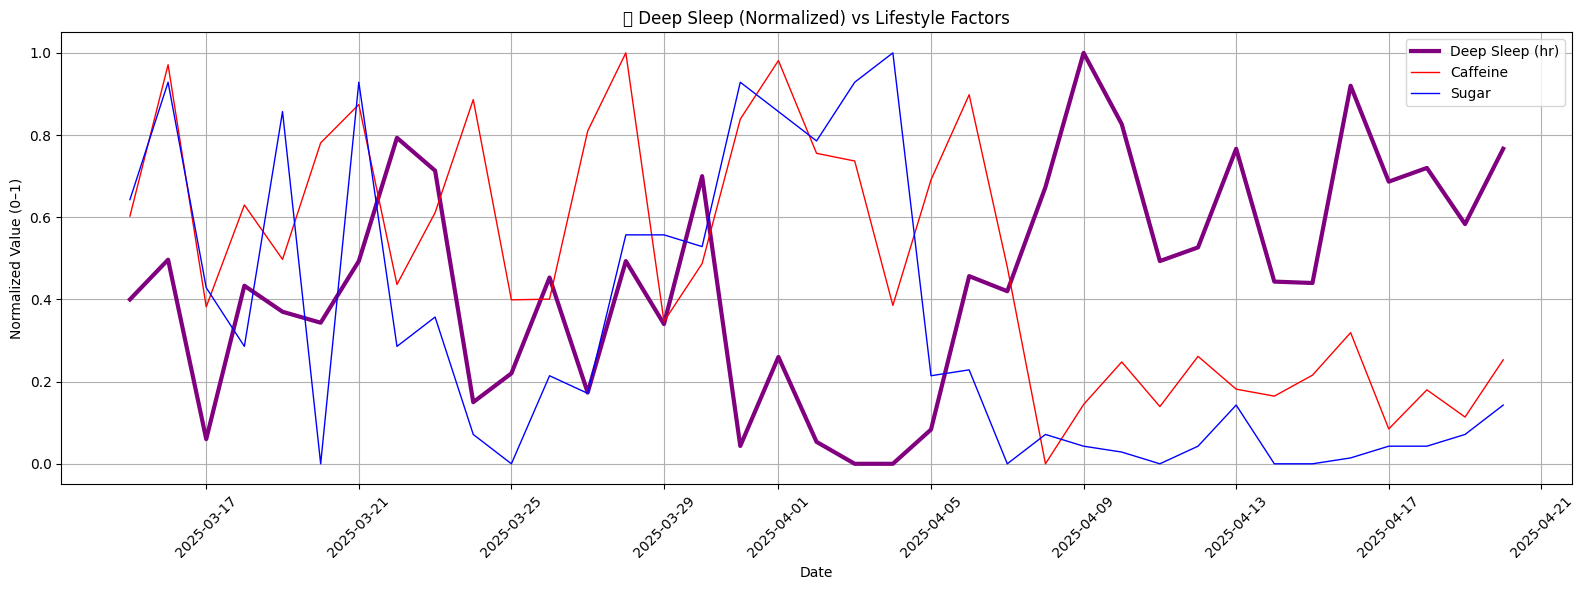

In [81]:
plt.figure(figsize=(16, 6))

# Deep Sleep: kalın çizgi
plt.plot(df["Date"], normalize(df["Custom Deep Sleep (hr)"]), label="Deep Sleep (hr)", color="purple", linewidth=3)

# Diğerleri: normalize ve daha hafif

plt.plot(df["Date"], normalize(df["Caffeine (mg)"]), label="Caffeine", color="red",linewidth=1)
plt.plot(df["Date"], normalize(df["Sugar (g)"]), label="Sugar", color="blue",linewidth=1 )


plt.title("📈 Deep Sleep (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-80-d2673f887a9c>:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


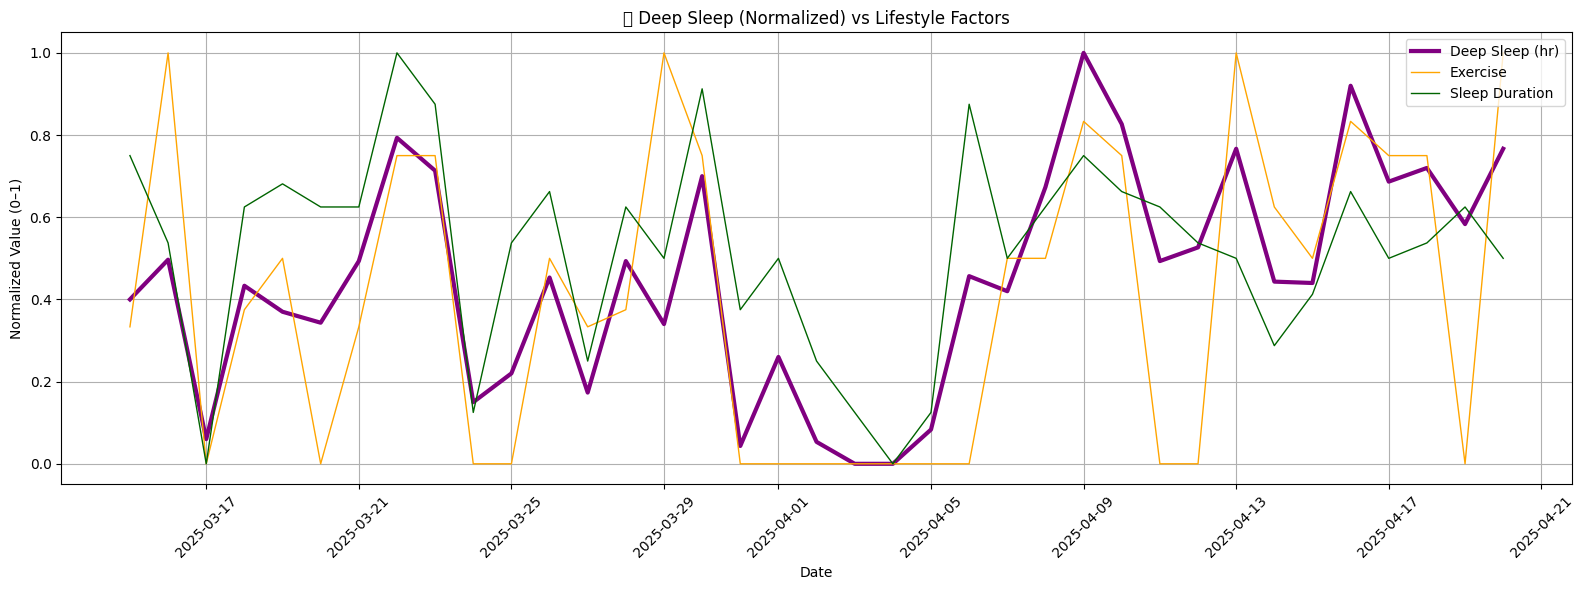

In [80]:
plt.figure(figsize=(16, 6))

# Deep Sleep: kalın çizgi
plt.plot(df["Date"], normalize(df["Custom Deep Sleep (hr)"]), label="Deep Sleep (hr)", color="purple", linewidth=3)

# Diğerleri: normalize ve daha hafif
plt.plot(df["Date"], normalize(df["Exercise(Fitness) (min)"]), label="Exercise", color="orange", linewidth=1)
plt.plot(df["Date"], normalize(df["Total Sleep Duration (min)"]), label="Sleep Duration", color="darkgreen", linewidth=1)

plt.title("📈 Deep Sleep (Normalized) vs Lifestyle Factors")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
from scipy.stats import pearsonr

r, p = pearsonr(df["Caffeine (mg)"], df["Total Sleep Duration (min)"])
print(f"H1 - Caffeine vs Sleep Duration → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H1 - Caffeine vs Sleep Duration → r: -0.10, p-value: 0.00003107
❌ Not significant (fail to reject H₀)


In [62]:
from scipy.stats import ttest_ind

active = df[df["Exercise(Fitness) (min)"] > 0]["Custom Deep Sleep (hr)"]
inactive = df[df["Exercise(Fitness) (min)"] == 0]["Custom Deep Sleep (hr)"]

t_stat, p_val = ttest_ind(active, inactive, equal_var=False)
print(f"H2 - Exercise vs Deep Sleep → t-statistic: {t_stat:.2f}, p-value: {p_val:.8f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H2 - Exercise vs Deep Sleep → t-statistic: 4.98, p-value: 0.00003107
✅ Statistically significant difference (reject H₀)


In [63]:
r, p = pearsonr(df["Phone Usage (min)"], df["Sleep Efficiency (%)"])
print(f"H4 - Phone Usage vs Sleep Efficiency → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H4 - Phone Usage vs Sleep Efficiency → r: -0.70, p-value: 0.00003107
✅ Statistically significant (reject H₀)


In [64]:
r, p = pearsonr(df["Sugar (g)"], df["Sleep Efficiency (%)"])
print(f"H7 - Sugar vs Sleep Efficiency → r: {r:.2f}, p-value: {p_val:.8f}")

if p < 0.05:
    print("✅ Statistically significant (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H7 - Sugar vs Sleep Efficiency → r: -0.61, p-value: 0.00003107
✅ Statistically significant (reject H₀)


In [53]:
high_caffeine = df[df["Caffeine (mg)"] > 400]["Sleep Efficiency (%)"]
low_caffeine = df[df["Caffeine (mg)"] <= 400]["Sleep Efficiency (%)"]

t_stat, p_val = ttest_ind(high_caffeine, low_caffeine, equal_var=False)
print(f"H9 - High vs Low Caffeine Sleep Efficiency → t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H9 - High vs Low Caffeine Sleep Efficiency → t-statistic: -10.13, p-value: 0.0000
✅ Statistically significant difference (reject H₀)


In [54]:
# Eğer Sleep Hour sütunun yoksa önce oluşturalım:
df["Sleep Hour"] = df["Sleep Onset Time"].astype(str).str.split(":").str[0].astype(int)

# Early = Saat 22, 23, 0 olanlar
early = df[df["Sleep Hour"].isin([22, 23, 0])]["Sleep Efficiency (%)"]

# Late = Saat 1, 2, 3, 4, 5 olanlar
late = df[df["Sleep Hour"].isin([1, 2, 3, 4, 5])]["Sleep Efficiency (%)"]

In [55]:

t_stat, p_val = ttest_ind(early, late, equal_var=False)
print(f"H3 (Updated) - Early vs Late Sleepers (Efficiency) → t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference (reject H₀)")
else:
    print("❌ Not significant (fail to reject H₀)")

H3 (Updated) - Early vs Late Sleepers (Efficiency) → t-statistic: 6.78, p-value: 0.0000
✅ Statistically significant difference (reject H₀)


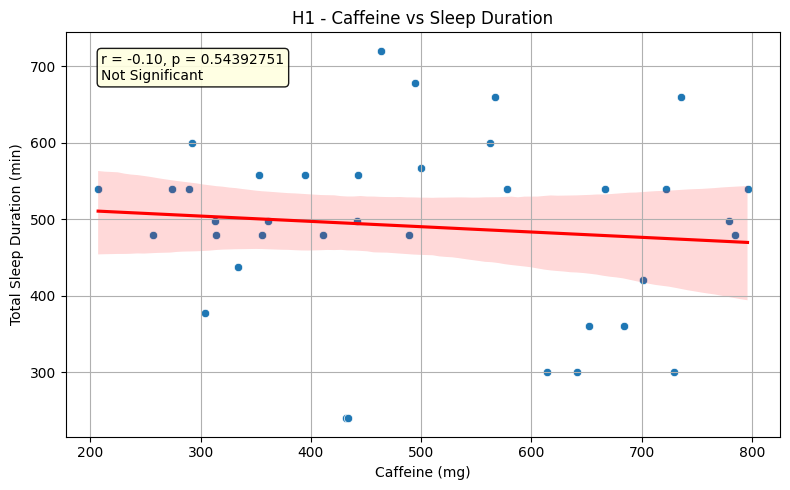

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Caffeine (mg)", y="Total Sleep Duration (min)")
sns.regplot(data=df, x="Caffeine (mg)", y="Total Sleep Duration (min)", scatter=False, color="red")
plt.title("H1 - Caffeine vs Sleep Duration")
r, p = pearsonr(df["Caffeine (mg)"], df["Total Sleep Duration (min)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

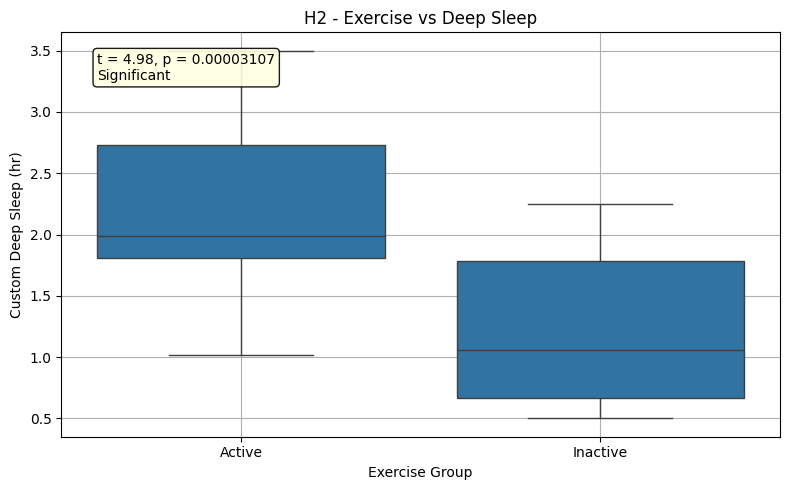

In [73]:
df["Exercise Group"] = df["Exercise(Fitness) (min)"].apply(lambda x: "Active" if x > 0 else "Inactive")
plt.figure(figsize=(8,5))
sns.boxplot(x="Exercise Group", y="Custom Deep Sleep (hr)", data=df)
plt.title("H2 - Exercise vs Deep Sleep")
active = df[df["Exercise Group"] == "Active"]["Custom Deep Sleep (hr)"]
inactive = df[df["Exercise Group"] == "Inactive"]["Custom Deep Sleep (hr)"]
t_stat, p_val = ttest_ind(active, inactive, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.8f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

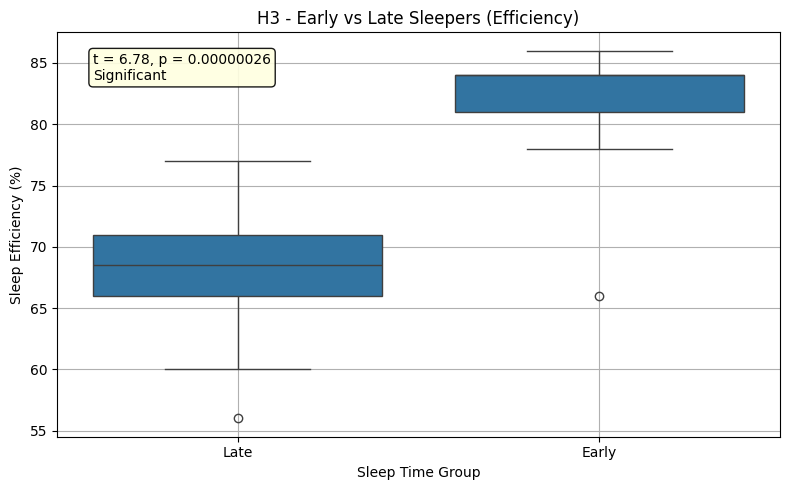

In [74]:
df["Sleep Hour"] = df["Sleep Onset Time"].astype(str).str.split(":").str[0].astype(int)
df["Sleep Time Group"] = df["Sleep Hour"].apply(lambda x: "Early" if x in [22,23,0] else ("Late" if x in [1,2,3,4,5] else None))
plt.figure(figsize=(8,5))
sns.boxplot(x="Sleep Time Group", y="Sleep Efficiency (%)", data=df[df["Sleep Time Group"].notna()])
plt.title("H3 - Early vs Late Sleepers (Efficiency)")
early = df[df["Sleep Time Group"] == "Early"]["Sleep Efficiency (%)"]
late = df[df["Sleep Time Group"] == "Late"]["Sleep Efficiency (%)"]
t_stat, p_val = ttest_ind(early, late, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.8f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

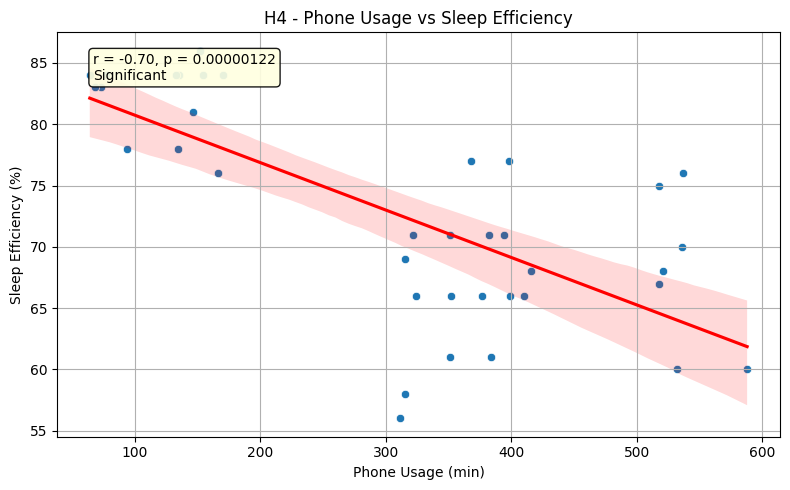

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Phone Usage (min)", y="Sleep Efficiency (%)")
sns.regplot(data=df, x="Phone Usage (min)", y="Sleep Efficiency (%)", scatter=False, color="red")
plt.title("H4 - Phone Usage vs Sleep Efficiency")
r, p = pearsonr(df["Phone Usage (min)"], df["Sleep Efficiency (%)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

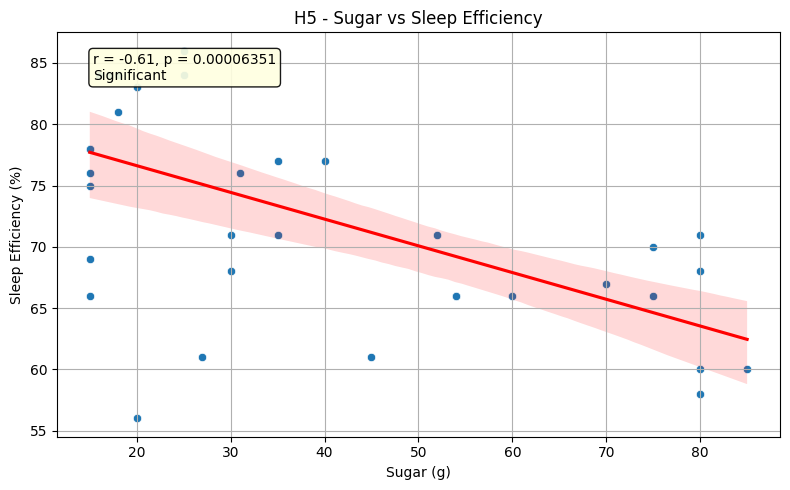

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sugar (g)", y="Sleep Efficiency (%)")
sns.regplot(data=df, x="Sugar (g)", y="Sleep Efficiency (%)", scatter=False, color="red")
plt.title("H5 - Sugar vs Sleep Efficiency")
r, p = pearsonr(df["Sugar (g)"], df["Sleep Efficiency (%)"])
result_text = f"r = {r:.2f}, p = {p:.8f}\n" + ("Significant" if p < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()

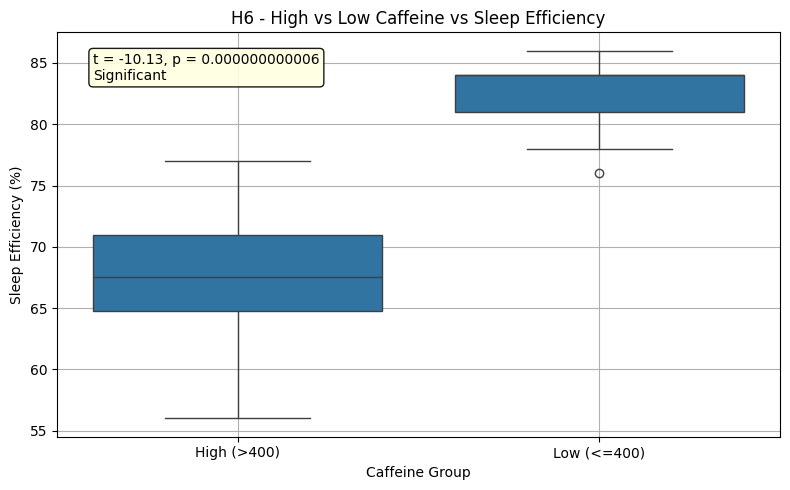

In [85]:
df["Caffeine Group"] = df["Caffeine (mg)"].apply(lambda x: "High (>400)" if x > 400 else "Low (<=400)")
plt.figure(figsize=(8,5))
sns.boxplot(x="Caffeine Group", y="Sleep Efficiency (%)", data=df)
plt.title("H6 - High vs Low Caffeine vs Sleep Efficiency")
high_caffeine = df[df["Caffeine Group"] == "High (>400)"]["Sleep Efficiency (%)"]
low_caffeine = df[df["Caffeine Group"] == "Low (<=400)"]["Sleep Efficiency (%)"]
t_stat, p_val = ttest_ind(high_caffeine, low_caffeine, equal_var=False)
result_text = f"t = {t_stat:.2f}, p = {p_val:.12f}\n" + ("Significant" if p_val < 0.05 else "Not Significant")
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
plt.text(0.05, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.grid(True)
plt.tight_layout()
plt.show()